<a href="https://colab.research.google.com/github/lsh3163/AI-Homework/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Data Project
## Data Load

In [ ]:
cd drive/

/content/drive


In [ ]:
cd 'My Drive'

/content/drive/My Drive


In [ ]:
import pandas as pd
df = pd.read_csv("winequality-white.csv", delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)
df_train = df_train.reset_index()

scaler = StandardScaler()
x_train, y_train = df_train.drop(columns=["quality", "index"]), df_train["quality"]
x_train = scaler.fit_transform(x_train)
df_test = df_test.reset_index()
x_test, y_test = df_test.drop(columns=["quality", "index"]), df_test["quality"]
x_test = scaler.transform(x_test)

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
y_train.value_counts()

6    1467
5     985
7     576
8     118
4     117
3      13
9       5
Name: quality, dtype: int64

In [ ]:
y_test.value_counts()

6    731
5    472
7    304
8     57
4     46
3      7
Name: quality, dtype: int64

* Class가 불균형한 데이터셋임을 알 수 있음. 

## EDA

* PCA로 선형 차원 축소를 한 결과 클래스별로 그다지 분포가 나뉘지는 않는다. 

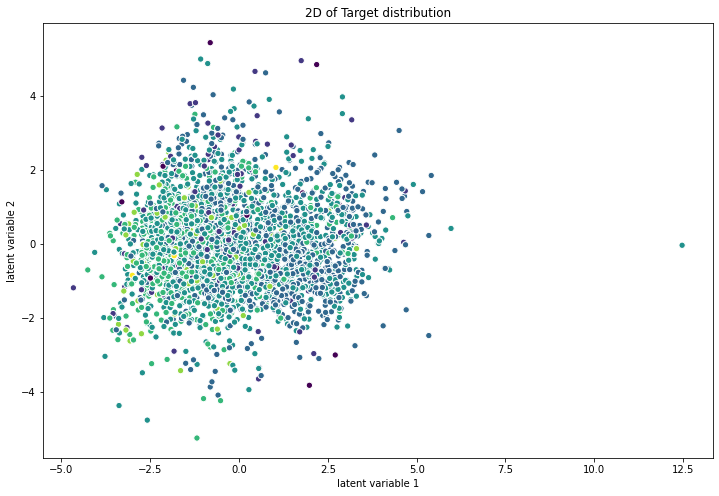

In [ ]:
# plot 2D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
data_pca = pca.fit_transform(x_train)

plt.figure(figsize=(12, 8))
plt.scatter(data_pca[:,0], data_pca[:,1], c=y_train, s=40, edgecolors='white')
plt.title("2D of Target distribution")
plt.xlabel('latent variable 1')
plt.ylabel('latent variable 2')
plt.show()

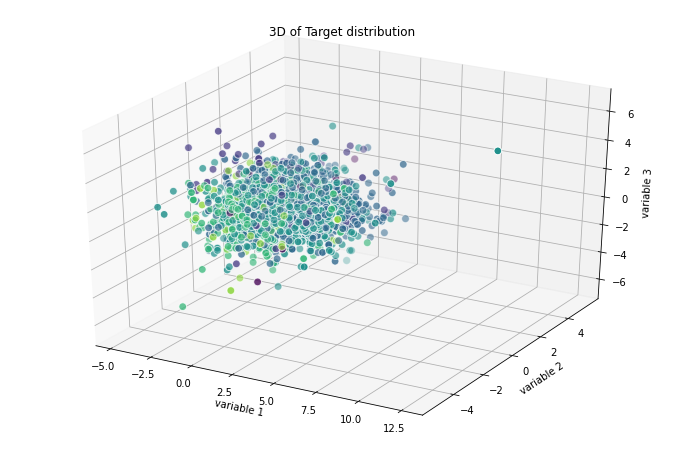

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
data_pca = pca.fit_transform(x_train)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:,0], data_pca[:,1], data_pca[:,2], c=y_train, s=60, edgecolors='white')
ax.set_title('3D of Target distribution')
ax.set_xlabel('variable 1')
ax.set_ylabel('variable 2')
ax.set_zlabel('variable 3')
plt.show()

* 비선형 차원 축소인 Kenrel PCA에 대하여 실험을 해보았다. 
* 연한 색과 진한 색의 분포가 조금 다른 것을 확인할 수 있다. 

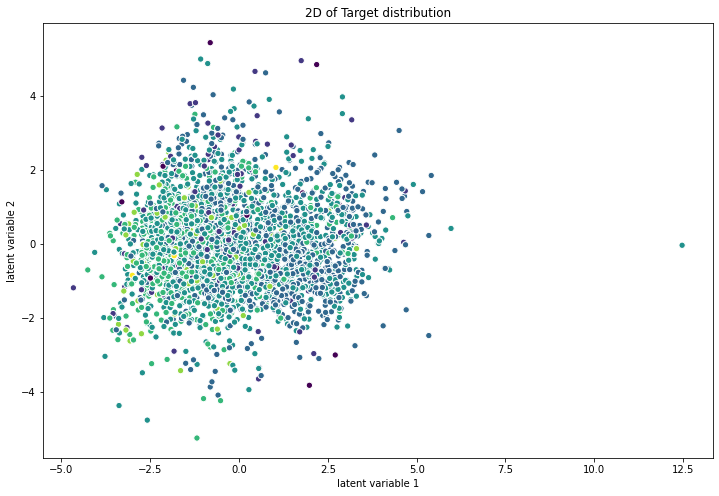

In [ ]:
# plot 2D
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

kpca = KernelPCA(n_components=2)
data_kpca = kpca.fit_transform(x_train)

plt.figure(figsize=(12, 8))
plt.scatter(data_kpca[:,0], data_kpca[:,1], c=y_train, s=40, edgecolors='white')
plt.title("2D of Target distribution")
plt.xlabel('latent variable 1')
plt.ylabel('latent variable 2')
plt.show()

* Correlation Matrix을 이용하여 변수 간 상관관계를 분석해본다. 
* Target 변수를 제외한 변수끼리 상관관계가 크진 않으므로 그대로 end-to-end 모델링을 한다. 

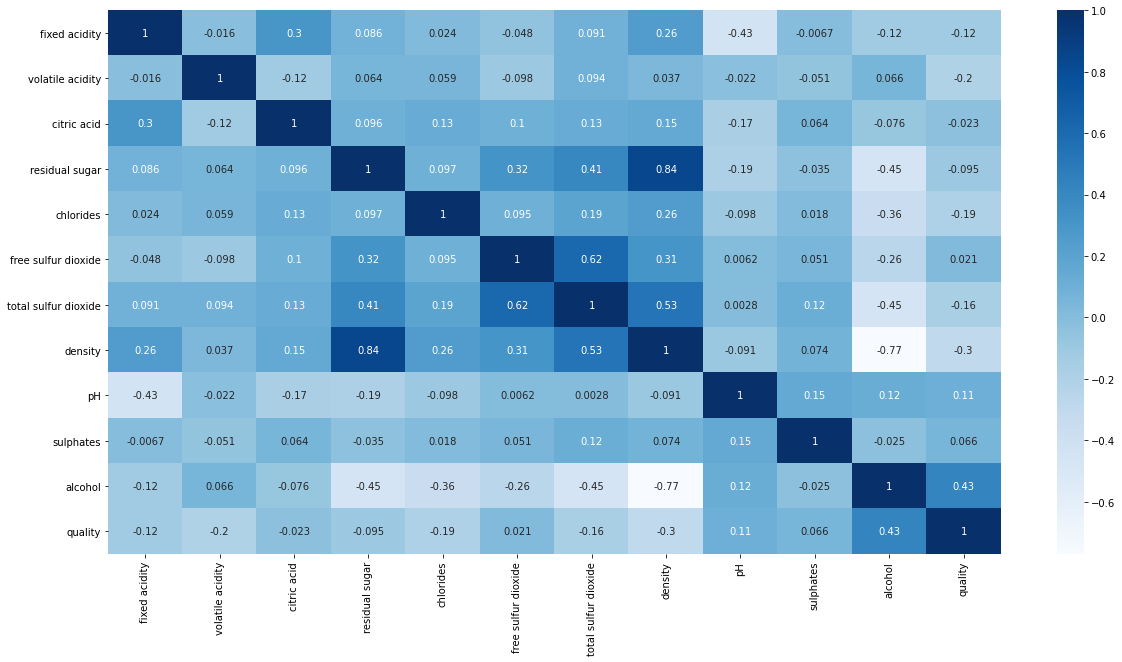

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df_train.drop(columns=["index"]).corr(), annot=True,cmap='Blues')
plt.show()

* 베이스라인 모델 Random Forest의 정확도는 다음과 같다. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

0.6691403834260977


* 클래스 불균형을 잘 해결하지 못했다.

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.53      0.20      0.29        46
           5       0.68      0.71      0.69       472
           6       0.65      0.77      0.71       731
           7       0.71      0.50      0.59       304
           8       0.95      0.37      0.53        57

    accuracy                           0.67      1617
   macro avg       0.59      0.42      0.47      1617
weighted avg       0.67      0.67      0.66      1617



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Modeling

In [ ]:
import pandas as pd
df = pd.read_csv("winequality-white.csv", delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
class2idx = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

idx2class = {v: k for k, v in class2idx.items()}

df['quality'].replace(class2idx, inplace=True)

In [ ]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [ ]:
# Split into train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=21)

In [ ]:
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

* Random Forest 베이스라인 : 0.67

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.6785714285714286


In [ ]:
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torch

class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
EPOCHS = 300
BATCH_SIZE = 128
LEARNING_RATE = 0.0007
NUM_FEATURES = len(X.columns)
NUM_CLASSES = 10

In [ ]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [ ]:
import torch.nn as nn


class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 256)
        self.layer_2 = nn.Linear(256, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.dropout = nn.Dropout(p=0.5)
        self.batchnorm1 = nn.BatchNorm1d(256)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.tanh(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.tanh(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.tanh(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [ ]:
import torch.optim as optim

model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=11, out_features=256, bias=True)
  (layer_2): Linear(in_features=256, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (tanh): Tanh()
  (dropout): Dropout(p=0.5, inplace=False)
  (batchnorm1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [ ]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc) * 100
    
    return acc

In [ ]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [ ]:
print("Begin training.")
for e in range(1, EPOCHS+1):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    if e%10==0:
      print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')

Begin training.
Epoch 010: | Train Loss: 1.43983 | Val Loss: 1.38875 | Train Acc: 50.000| Val Acc: 48.214
Epoch 020: | Train Loss: 1.11312 | Val Loss: 1.11279 | Train Acc: 82.143| Val Acc: 52.551
Epoch 030: | Train Loss: 1.04937 | Val Loss: 1.07734 | Train Acc: 96.429| Val Acc: 54.337
Epoch 040: | Train Loss: 0.99427 | Val Loss: 1.04795 | Train Acc: 100.000| Val Acc: 56.633
Epoch 050: | Train Loss: 0.96643 | Val Loss: 1.04163 | Train Acc: 100.000| Val Acc: 57.908
Epoch 060: | Train Loss: 0.93858 | Val Loss: 1.04255 | Train Acc: 100.000| Val Acc: 57.398
Epoch 070: | Train Loss: 0.91025 | Val Loss: 1.04125 | Train Acc: 100.000| Val Acc: 56.378
Epoch 080: | Train Loss: 0.87513 | Val Loss: 1.04718 | Train Acc: 100.000| Val Acc: 57.653
Epoch 090: | Train Loss: 0.84755 | Val Loss: 1.05652 | Train Acc: 100.000| Val Acc: 57.653
Epoch 100: | Train Loss: 0.81919 | Val Loss: 1.05833 | Train Acc: 100.000| Val Acc: 57.908
Epoch 110: | Train Loss: 0.78459 | Val Loss: 1.06401 | Train Acc: 100.000| Va

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

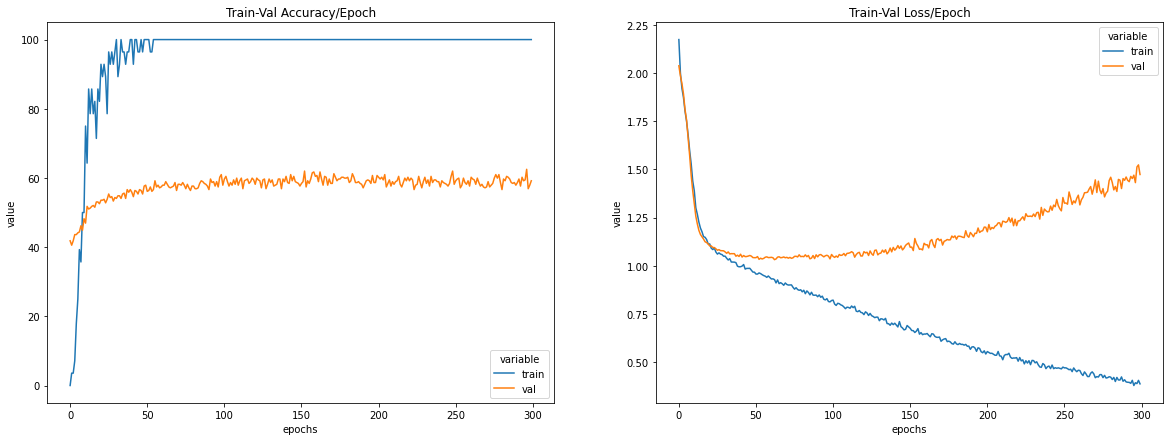

In [ ]:
import pandas as pd
import seaborn as sns
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [ ]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_softmax = torch.log_softmax(y_test_pred, dim = 1)
        _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

* Random Forest ACC : 0.66~0.67와 비교했을 때 딥러닝의 성능이 오히려 더 나쁜 것을 알 수 있음. 

In [ ]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.38      0.36      0.37        33
           2       0.63      0.64      0.64       291
           3       0.65      0.58      0.61       440
           4       0.49      0.63      0.55       176
           5       0.31      0.29      0.30        35
           9       0.00      0.00      0.00         1

    accuracy                           0.59       980
   macro avg       0.35      0.36      0.35       980
weighted avg       0.59      0.59      0.59       980



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
